In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [33]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target_names[iris.target]
x = iris.data
y = iris.target

In [21]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris_df.shape

(150, 4)

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [25]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [28]:
iris_df.drop_duplicates(inplace=True)

In [30]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


In [32]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


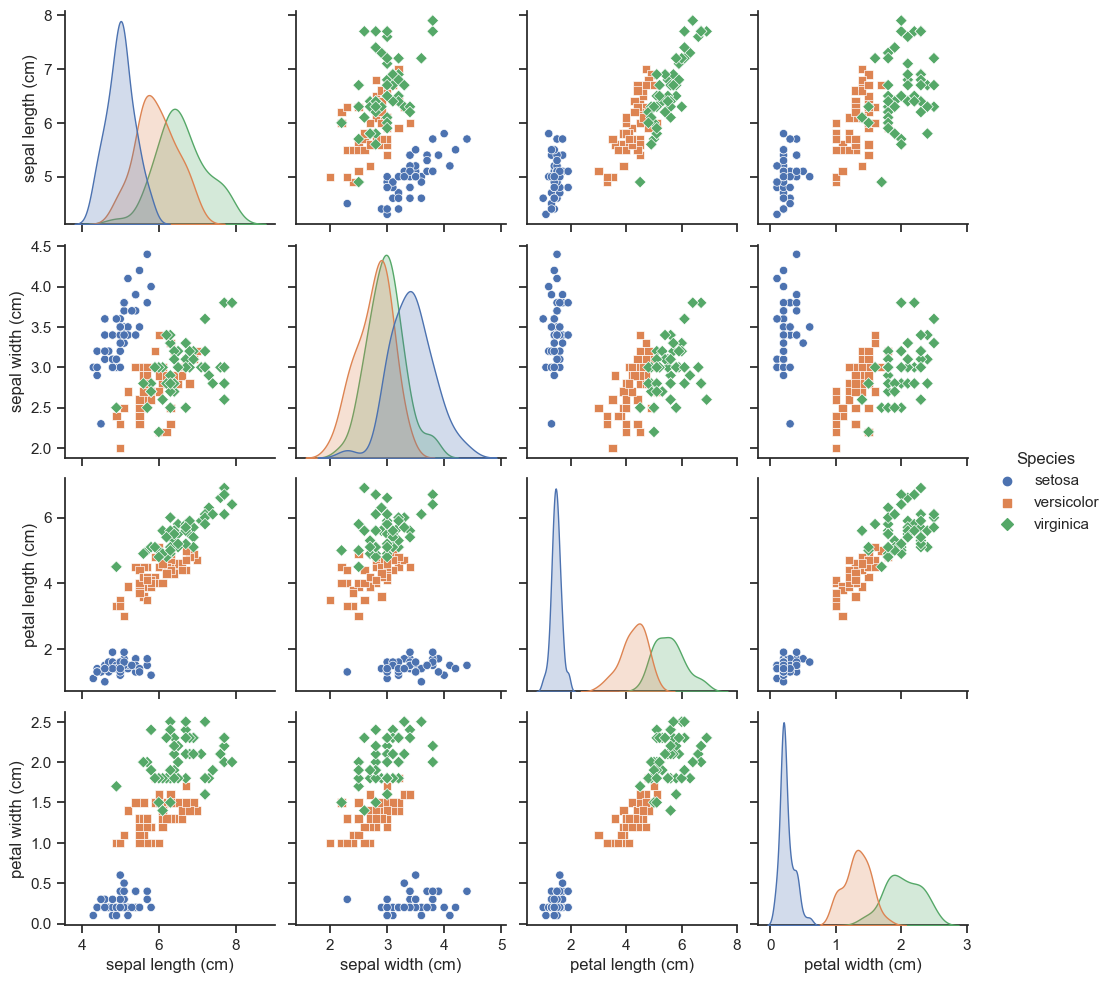

In [34]:
sns.set(style="ticks")
sns.pairplot(iris_df, hue="Species", markers=["o", "s", "D"])
plt.show()

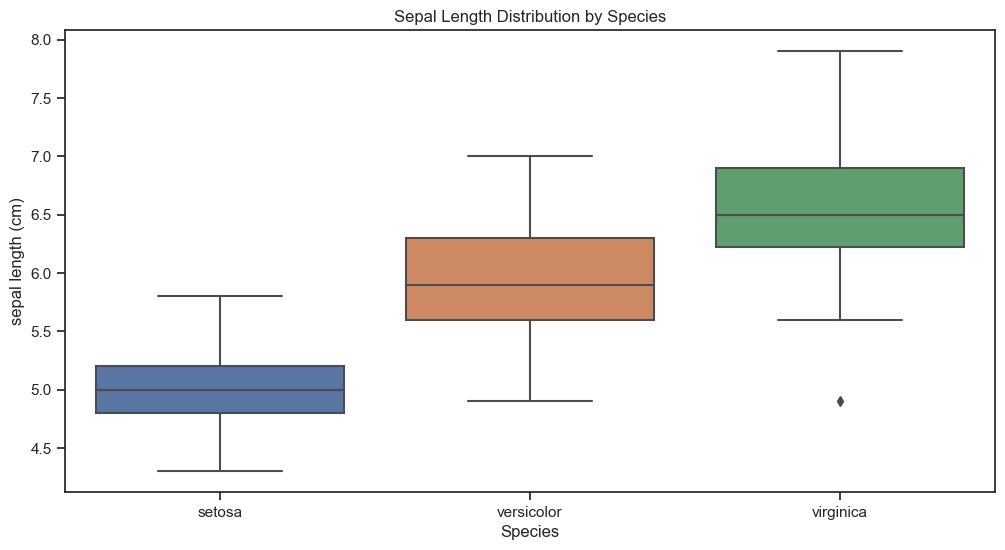

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Species", y="sepal length (cm)", data=iris_df)
plt.title("Sepal Length Distribution by Species")
plt.show()

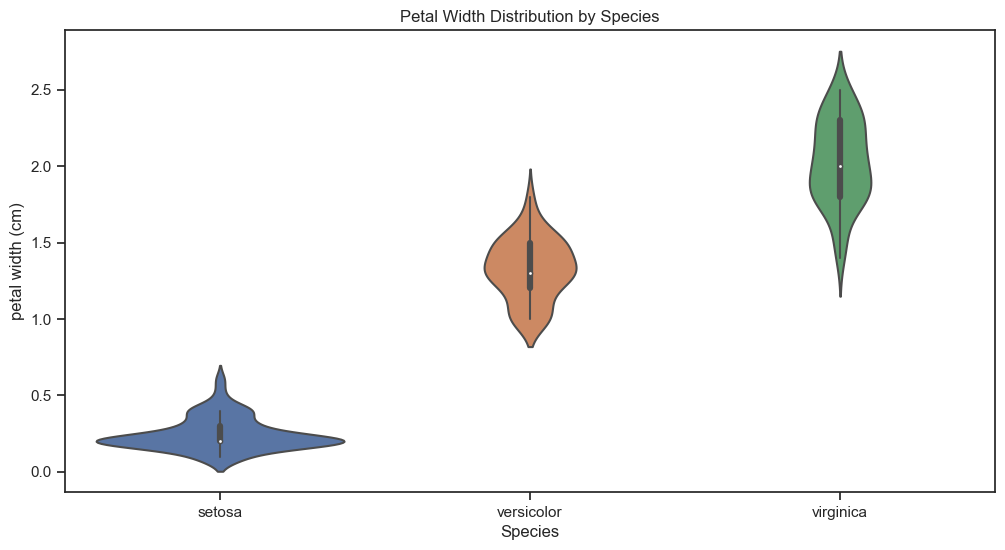

In [36]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Species", y="petal width (cm)", data=iris_df)
plt.title("Petal Width Distribution by Species")
plt.show()

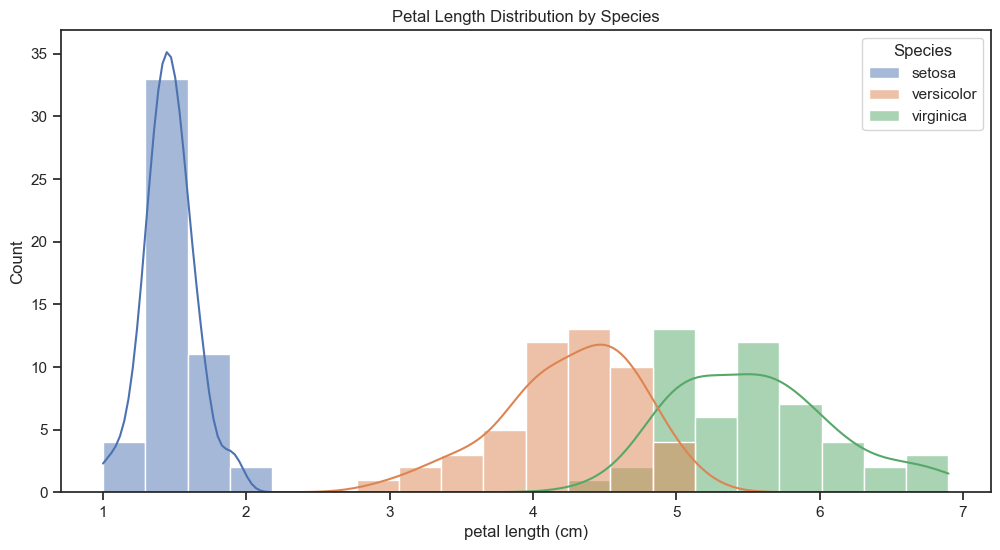

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data=iris_df, x="petal length (cm)", hue="Species", bins=20, kde=True)
plt.title("Petal Length Distribution by Species")
plt.show()

C:\Users\Haritha\AppData\Local\Temp\ipykernel_17264\3689263813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_df.corr()


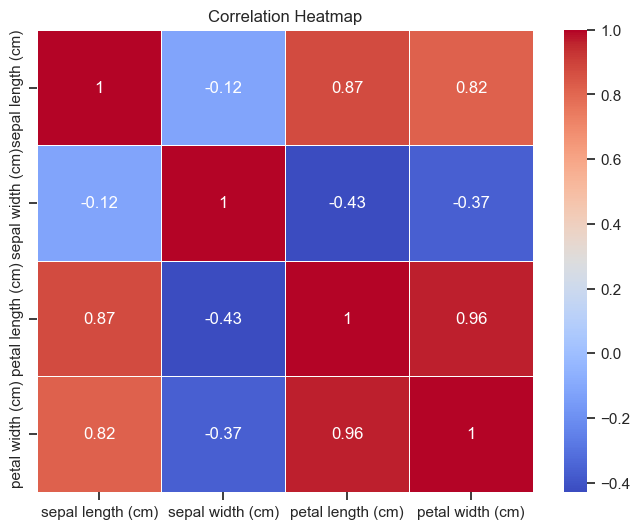

In [38]:
correlation_matrix = iris_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
model.score(x_test, y_test)

0.9468960016420045

In [11]:
y_pred = model.predict(x_test)

In [12]:
y_pred_rounded = np.round(y_pred).astype(int)

In [15]:
mse = mean_squared_error(y_test, y_pred_rounded)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


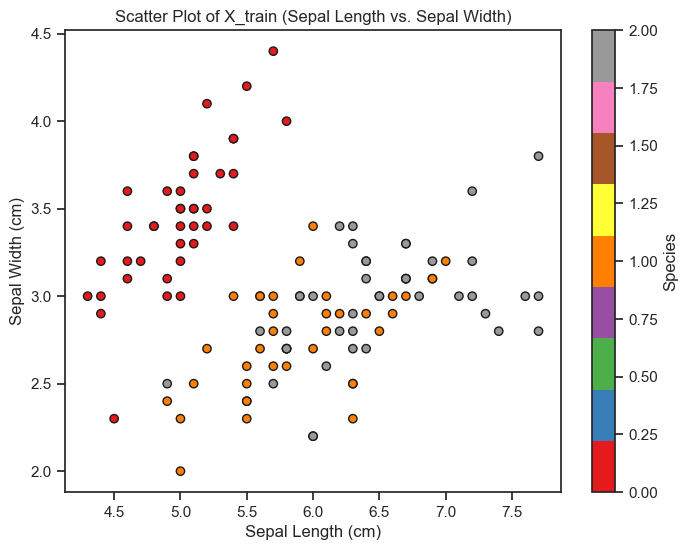

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of X_train (Sepal Length vs. Sepal Width)')
plt.colorbar(label='Species')
plt.show()

In [40]:
import statsmodels.api as sm

In [41]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                   3.17e-112
Time:                        14:30:24   Log-Likelihood:                          17.009
No. Observations:                 150   AIC:                                     -26.02
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------